## Case 2 - Diabetic retinopathy analysis

Jenni Hautojärvi   
Last edited: 25.2.2017   
Cognitive Systems for Health Technology Applications   
Helsinki Metropolia University of Applied Sciences

# 1. Objectives

In this assignment the main goal was to get familiar how to use convolutional neural networks to classify medical. In this case used diabetic retinopathy images and calculated some test metrics.

# 2. Required libraries

In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


Using TensorFlow backend.


# 3. Load compiled model

Model can be found in Case 2 -  5. trial. I tried out multiple models but best result was found when you didn't drop anything in the model.

In [2]:
# loads a previously compiled model
model = load_model('case_2_run_5.h5')

# 4. Load Test data and Data preprocessing

In [3]:
test_dir = '/Users/hautsi/Documents/Cognitive Systems for Health Technology Applications /retinopathy-dataset-master/dataset2/test'

#Scalar multiplying the images
test_datagen = ImageDataGenerator(rescale=1./255)

# 5. Test the model

In [4]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=25,
        class_mode='binary')

r = model.evaluate_generator(test_generator, steps = 21)

# Loss and accuracy
print ('Loss: ',"%.2f"% (r[0]))
print ('Accuracy: ', "%.2f"% (r[1]))

Found 413 images belonging to 2 classes.
Loss:  0.50
Accuracy:  0.77


# 6. Predict the score

In [5]:
y_true = np.zeros(413)
y_score = np.zeros(413)
sample_count = 413
i = 0
for inputs_batch, labels_batch in test_generator:
        predicts_batch = model.predict(inputs_batch)
        L = labels_batch.shape[0]
        index = range(i, i + L)
        y_true[index] = labels_batch.ravel()
        y_score[index] = predicts_batch.ravel()
        i = i + L
        if i >= sample_count:
            break

# 7. Calculate ROC and AUC

An ROC (Receiver Operating Characteristic) curve is the most commonly used way to visualize the performance of a binary classifier, and AUC (Area Under the Curve) is (arguably) the best way to summarize its performance in a single number.

Area under the curve:
- 0.9 - 1 = excellent
- 0.8 - 0.9 = good
- 0.7 - 0.8 = fair
- 0.6 - 0.7 = poor
- 0.5 - 0.6 = fail

Sources: 
- [Data school](http://www.dataschool.io/roc-curves-and-auc-explained/)
- [The Area Under an ROC Curve](http://gim.unmc.edu/dxtests/roc3.htm)

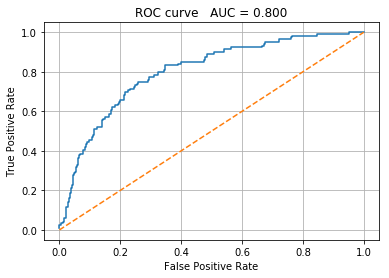

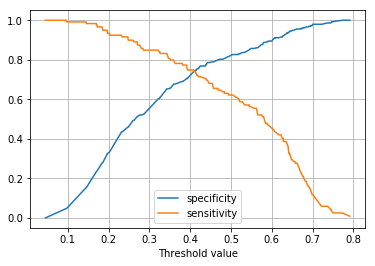

In [6]:
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc = roc_auc_score(y_true, y_score)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve   AUC = {:.3f}'.format(auc))
plt.show()

plt.figure()
plt.plot(thresholds, 1-fpr, label = 'specificity')
plt.plot(thresholds, tpr, label = 'sensitivity')
plt.legend()
plt.grid()
plt.xlabel('Threshold value')
plt.show()

From the figure we can see that the AUC value is 0.8 so the model is fair/good. I noticed that if you use dropping in the model, the bigger is the dropping procent you can see the bigger dropping in the AUC value. In this model there was no dropping. 
   
      
From the boddom figure we can see that the accuracity is same vere 0.70-0.77 scale were the threshold value is like 0.42.

In [7]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
#from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
#from sklearn.metrics import classification_report, recall_score
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import average_precision_score

# 8. Calculate the metrics

In [28]:
# Select the threshold to maximize both specificity and sensitivity
th = 0.42

In [29]:
acc = accuracy_score(y_true, y_score > th)
prec = precision_score(y_true, y_score > th)
f1 = f1_score(y_true, y_score > th)
recall = recall_score(y_true, y_score > th)

print('Accuracy:  {:.3f}'.format(acc))
print('Precision: {:.3f}'.format(prec))
print('Recall:    {:.3f}'.format(recall))
print('F1:        {:.3f}'.format(f1))

Accuracy:  0.746
Precision: 0.545
Recall:    0.714
F1:        0.618


In [30]:
print('Classification report')
print(classification_report(y_true, y_score > th, labels = [1.0, 0.0], target_names = ['Disease', 'Healthy']))

Classification report
             precision    recall  f1-score   support

    Disease       0.54      0.71      0.62       119
    Healthy       0.87      0.76      0.81       294

avg / total       0.77      0.75      0.75       413



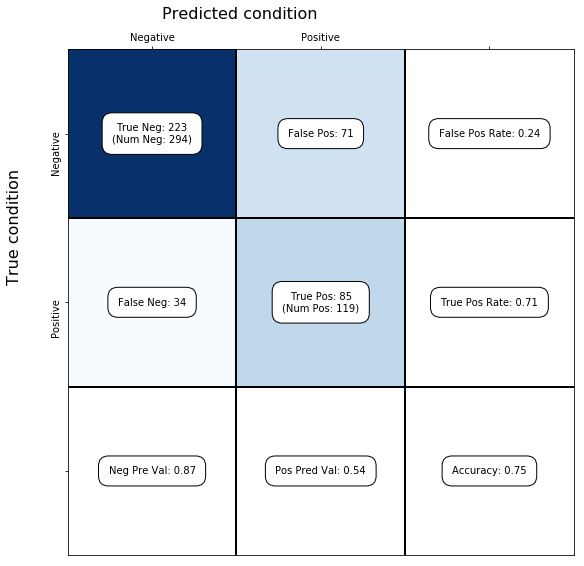

Sensitivity: 0.714
Specificity: 0.759


In [31]:
tn, fp, fn, tp = confusion_matrix(y_true, y_score > th).ravel()
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.Blues)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted condition', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True condition', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

C = confusion_matrix(y_true, y_score > th)
show_confusion_matrix(C, ['Negative', 'Positive'])

print('Sensitivity: {:.3f}'.format(tp/(tp+fn)))
print('Specificity: {:.3f}'.format(tn/(tn+fp)))

From the matrix we can see that the accuracy was 75 %. Not very good but it was the best result that I had.

# 8. Conclusions

Using util.invert to the images the model testing get values for Loss 0.53 and Accuracy 0.75. but AUC was 0.73. So comparing it to this run inverting the images was not very good idea or it would needed something else whit it.

This assignment was good for learning how to use convolutional neural networks work and how it can be used to classify medical images.

I used my time to figure out how the image augmentation and batch size influence in classification. Next I would do is find out would adding more dropout layers influence for the results. I came across the bottleneck, but I do not know if it can be used.